AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [16]:
import pandas as pd
ti = pd.read_csv("titanic.csv")
print("First 10 rows of the dataset:")
print(ti.head(10).to_string)
print("Last 20 rows of dataset:")
print(ti.tail(20))
print("Dataset information:")
print(ti.info())
print("Describe the dataset:")
print(ti.describe())


First 10 rows of the dataset:
<bound method DataFrame.to_string of    PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   
5            6        0       3   
6            7        0       1   
7            8        0       3   
8            9        1       3   
9           10        1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6       

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


In [17]:
import pandas as pd

ti = pd.read_csv("titanic.csv")
missing_values = ti.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


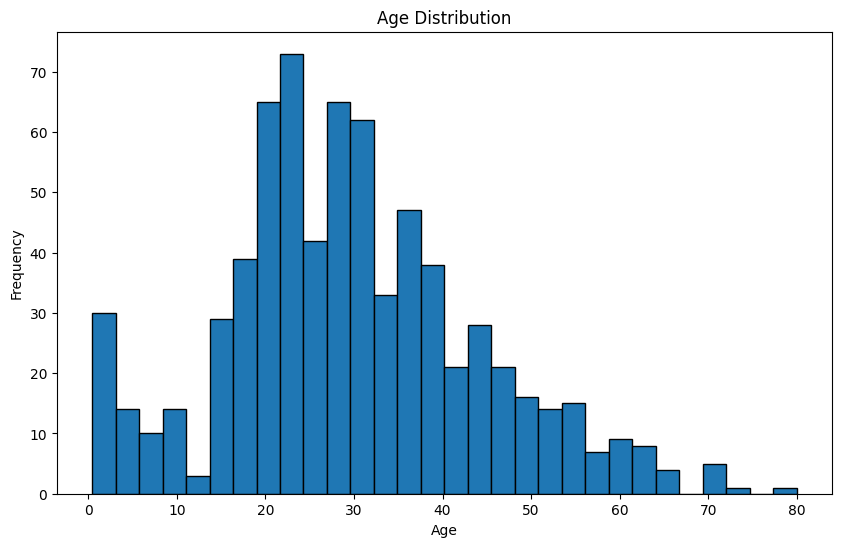

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

ti = pd.read_csv("titanic.csv")
plt.figure(figsize=(10, 6))
plt.hist(ti['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Number of missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


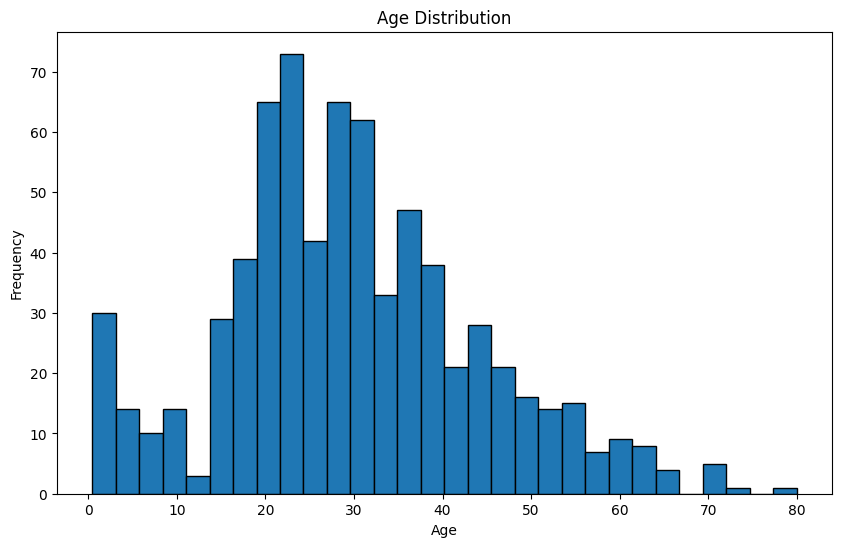

0       545
1       340
Zero      3
One       3
Name: Survived, dtype: int64
Number of missing values in Fare column: 0


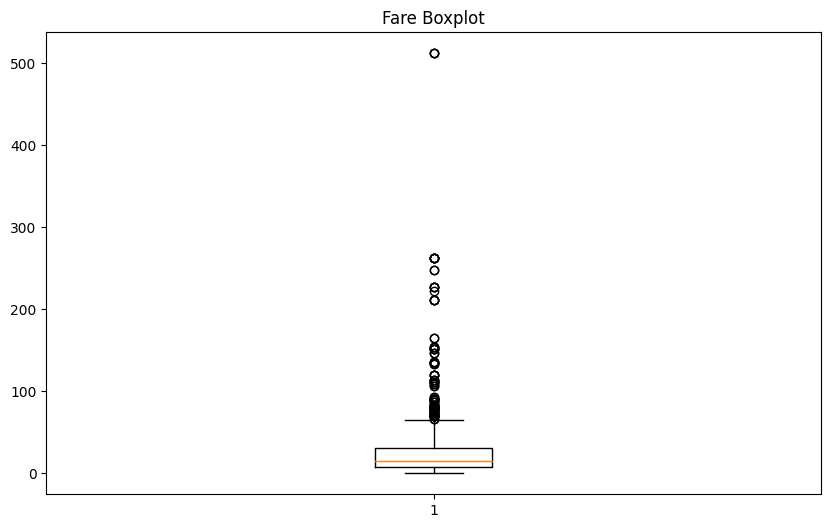

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('titanic.csv')

# Step 1: Find out how many missing values there are in the dataset
missing_values = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

# Step 2: Handle missing values in the 'Age' column

## 2.1 Use an appropriate plot to study the nature of the 'Age' column
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 2.2 Determine the best way to calculate the central tendency of the 'Age' column based on the above plot

## 2.3 Using the most suitable central tendency measure, fill the missing values in the age column
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Step 3: Decide what is the best way to handle the missing values in the 'Cabin' column
most_common_cabin = df['Cabin'].mode()[0]
df['Cabin'].fillna(most_common_cabin, inplace=True)

# Step 4: Similarly, decide what is the best way to handle the missing values in the 'Embarked' column
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)

# Step 5: Handle the incorrect data under the 'Survived' column using appropriate measures
print(df['Survived'].value_counts())
df['Survived'] = df['Survived'].apply(lambda x: 1 if x not in [0, 1] else x)

# Step 6: Handle the incorrectly formatted data under the 'Fare' column
# Remove the currency symbol and convert the 'Fare' column to numeric type
df['Fare'] = df['Fare'].replace('[\$,]', '', regex=True).astype(float)

missing_fare = df['Fare'].isnull().sum()
print("Number of missing values in Fare column:", missing_fare)
median_fare = df['Fare'].median()
df['Fare'].fillna(median_fare, inplace=True)

plt.figure(figsize=(10, 6))
plt.boxplot(df['Fare'].dropna())
plt.title('Fare Boxplot')
plt.show()

q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['Fare'] = df['Fare'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

Average fare grouped by Pclass:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


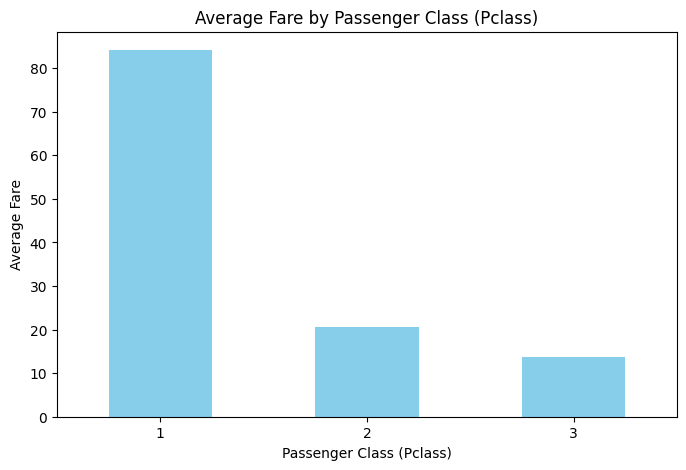


Average fare grouped by Sex:
Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64


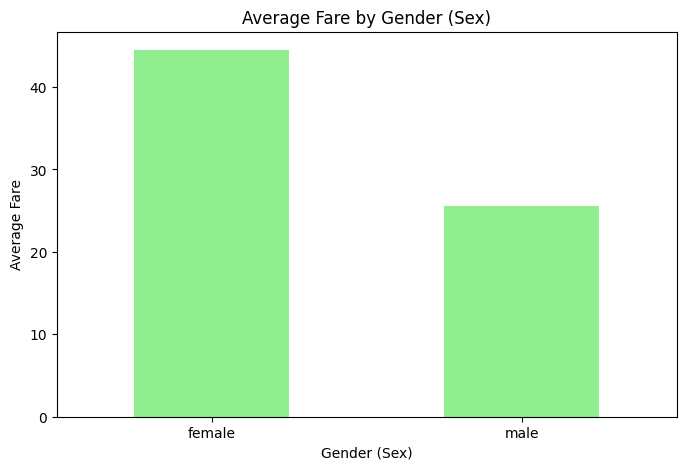

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('titanic.csv')
# Clean the 'Fare' column by removing currency symbols and converting to float
df['Fare'] = df['Fare'].replace('[\$,]', '', regex=True)
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')  # Convert to numeric, coerce errors to NaN
# Drop rows where 'Fare' is still NaN after conversion
df.dropna(subset=['Fare'], inplace=True)
# Step 1: Find out the average fare grouped by Pclass
average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()
print("Average fare grouped by Pclass:")
print(average_fare_by_pclass)
# Step 1.1: Plot the average fare by Pclass
plt.figure(figsize=(8, 5))
average_fare_by_pclass.plot(kind='bar', color='skyblue')
plt.title('Average Fare by Passenger Class (Pclass)')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()
# Step 2: Find out the average fare grouped by Sex
average_fare_by_sex = df.groupby('Sex')['Fare'].mean()
print("\nAverage fare grouped by Sex:")
print(average_fare_by_sex)
# Step 2.1: Plot the average fare by Sex
plt.figure(figsize=(8, 5))
average_fare_by_sex.plot(kind='bar', color='lightgreen')
plt.title('Average Fare by Gender (Sex)')
plt.xlabel('Gender (Sex)')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

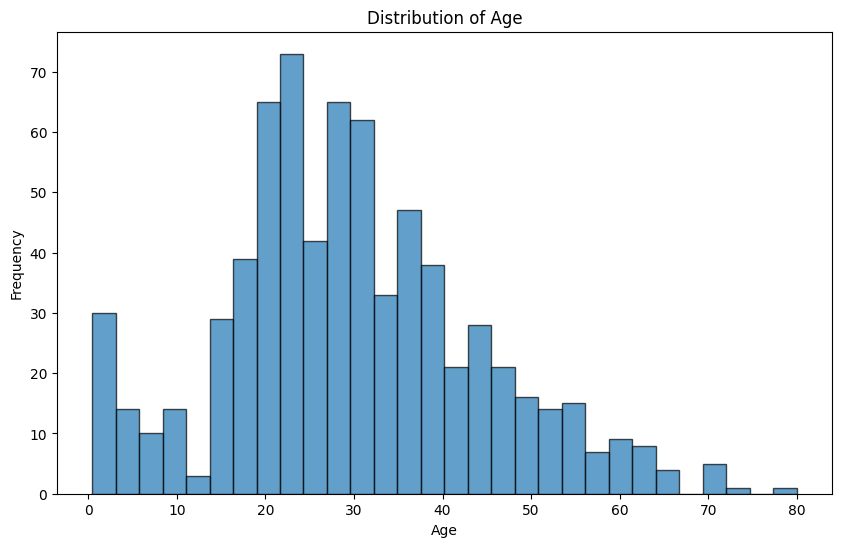

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")
#age
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

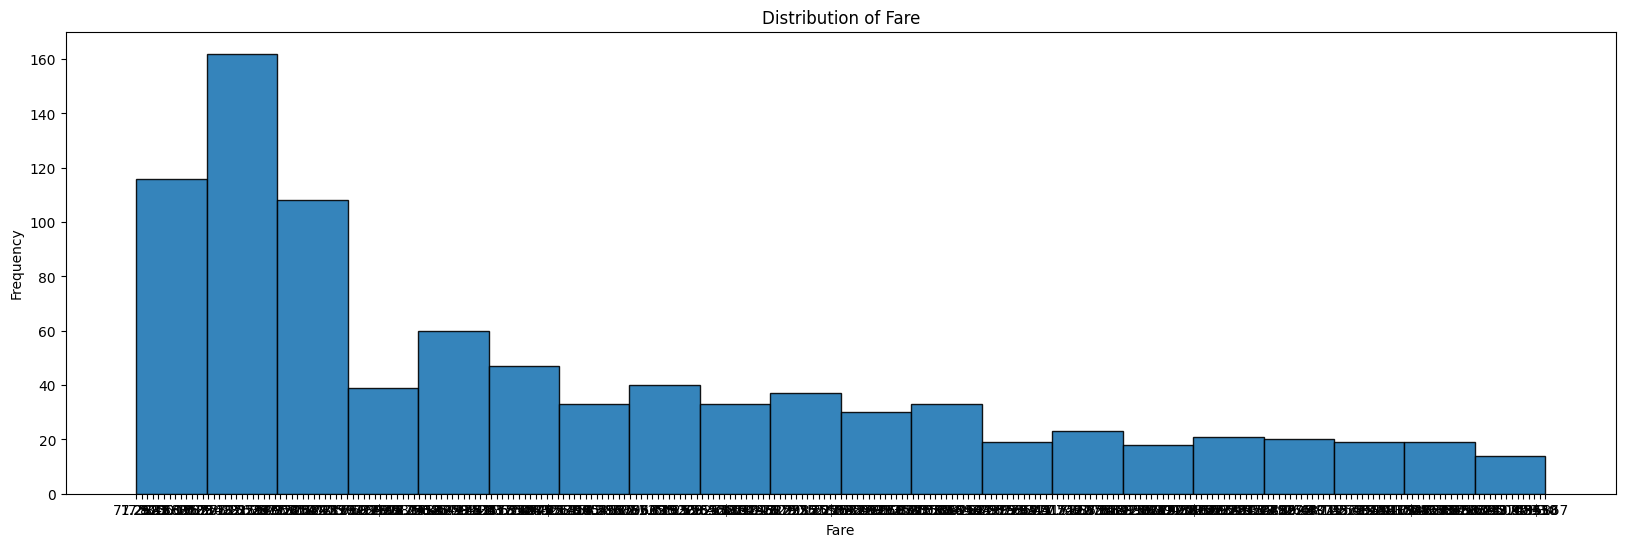

In [21]:
#fare
plt.figure(figsize=(20, 6))
plt.hist(df['Fare'].dropna(), bins=20, edgecolor='black', alpha=0.9)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

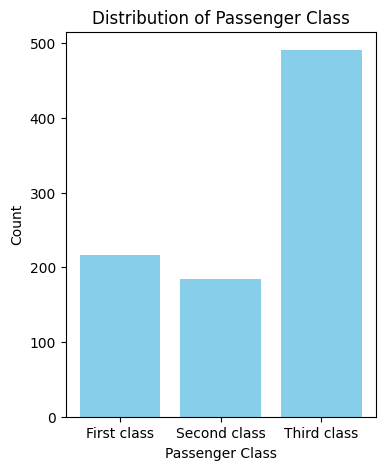

In [61]:
#pclass
plt.figure(figsize=(4, 5))
plt.bar(df['Pclass'].value_counts().index, df['Pclass'].value_counts().values, color='skyblue')
plt.title('Distribution of Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.xticks(ticks=[1,2,3], labels=['First class', 'Second class','Third class'])
plt.show()

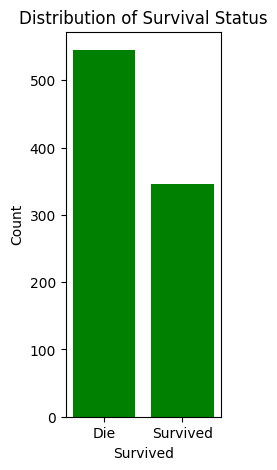

In [57]:
#survived

df['Survived'] = df['Survived'].replace({'One': 1, 'Zero': 0})
df['Survived'] = df['Survived'].astype(int)
plt.figure(figsize=(2, 5))
plt.bar(df['Survived'].value_counts().index, df['Survived'].value_counts().values, color='green')
plt.title('Distribution of Survival Status')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.xticks(ticks=[0, 1], labels=['Die', 'Survived'])
plt.show()

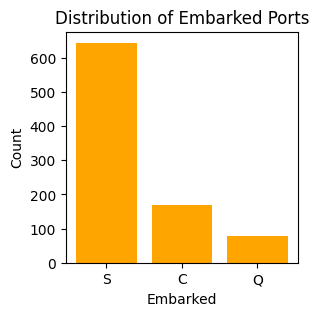

In [37]:
#Embarked
plt.figure(figsize=(3, 3))
embarked_counts = df['Embarked'].value_counts()
plt.bar(embarked_counts.index, embarked_counts.values, color='orange')
plt.title('Distribution of Embarked Ports')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

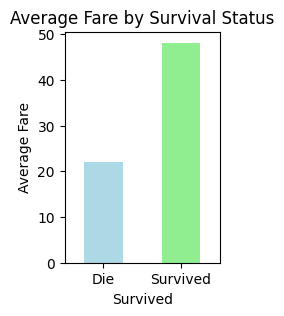

In [51]:
#Average Fare by Survival Status
df['Fare'] = df['Fare'].replace('[\$,]', '', regex=True)  
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')  

median_fare = df['Fare'].median()
df['Fare'].fillna(median_fare, inplace=True)
plt.figure(figsize=(2, 3))
df.groupby('Survived')['Fare'].mean().plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Average Fare by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.xticks(ticks=[0, 1], labels=['Die', 'Survived'])
plt.show()

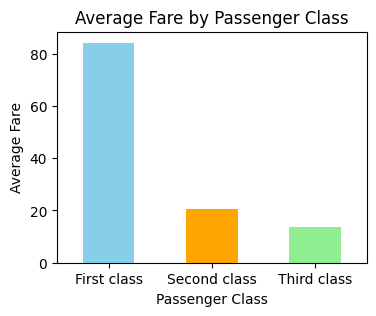

In [58]:
#Average Fare by Passenger Class
plt.figure(figsize=(4, 3))
df.groupby('Pclass')['Fare'].mean().plot(kind='bar', color=['skyblue', 'orange', 'lightgreen'])
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.xticks(ticks=[0,1,2], labels=['First class', 'Second class','Third class'])
plt.show()

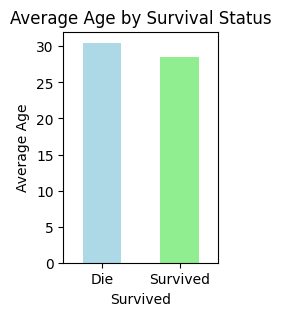

In [52]:
# #Average Fare by Passenger Class
plt.figure(figsize=(2, 3))
df.groupby('Survived')['Age'].mean().plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Average Age by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.xticks(ticks=[0, 1], labels=['Die', 'Survived'])
plt.show()


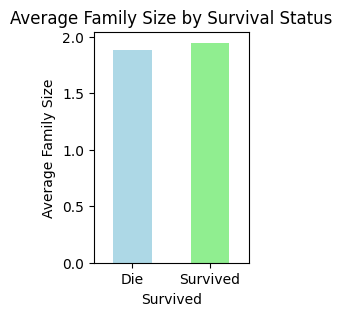

In [53]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
plt.figure(figsize=(2, 3))
df.groupby('Survived')['FamilySize'].mean().plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Average Family Size by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Average Family Size')
plt.xticks(rotation=0)
plt.xticks(ticks=[0, 1], labels=['Die', 'Survived'])
plt.show()

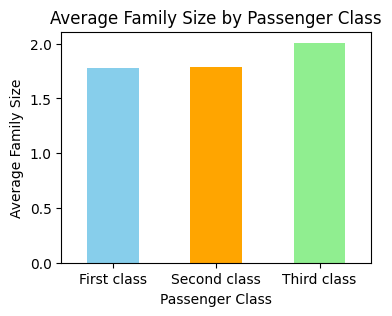

In [64]:
plt.figure(figsize=(4, 3))
df.groupby('Pclass')['FamilySize'].mean().plot(kind='bar', color=['skyblue', 'orange', 'lightgreen'])
plt.title('Average Family Size by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Family Size')
plt.xticks(ticks=[0,1,2], labels=['First class', 'Second class','Third class'])
plt.xticks(rotation=0)
plt.show()

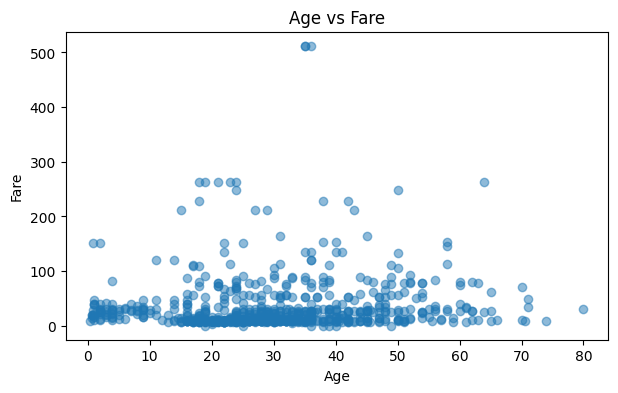

In [68]:
plt.figure(figsize=(7, 4))
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

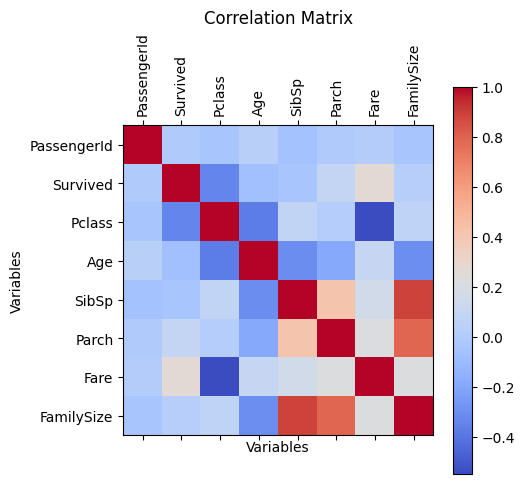

In [71]:

correlation_matrix = df.corr()

plt.figure(figsize=(5, 5))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.colorbar()
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

In [73]:

age_fare_correlation = df['Age'].corr(df['Fare'])

print(f"The correlation between 'Age' and 'Fare' is: {age_fare_correlation:.2f}")

The correlation between 'Age' and 'Fare' is: 0.10


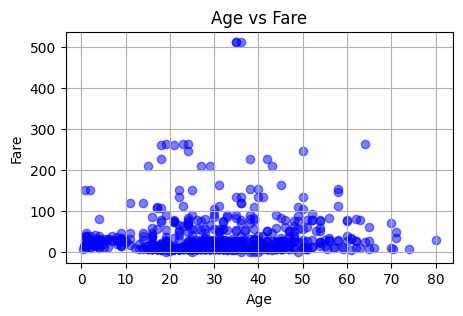

In [75]:
plt.figure(figsize=(5, 3))
plt.scatter(df['Age'], df['Fare'], color='blue', alpha=0.5)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()